<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema04/05-elastic-net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 67kB/s 
     |████████████████████████████████| 491kB 31.4MB/s 
     |████████████████████████████████| 3.2MB 40.3MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


# Elastic Net

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [12]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [0]:
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [8]:
print(x_vals[0])
print(y_vals[0])

[3.5 1.4 0.2]
5.1


- $x\in\mathbb R^3$
- $A \in \mathbb R_{3\times 1}$
- $y = Ax+b\in \mathbb R$

In [0]:
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [3,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [0]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target- y_pred)),e1_term), e2_term), 0)

In [0]:
init = tf.global_variables_initializer()
session.run(init)

In [0]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_opt.minimize(loss)

In [20]:
loss_vec = []
for i in range(1000):
    rand_idx = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+" A = "+str(session.run(A))+", b = "+str(session.run(b))+
             " Loss: "+str(temp_loss))

Paso #100 A = [[ 0.9368327 ]
 [ 0.8294003 ]
 [-0.17005166]], b = [[-0.18693948]] Loss: [1.6755357]
Paso #200 A = [[ 0.9831819 ]
 [ 0.777062  ]
 [-0.13371709]], b = [[-0.1409113]] Loss: [1.4798691]
Paso #300 A = [[ 1.0148324 ]
 [ 0.7347902 ]
 [-0.09584964]], b = [[-0.0981079]] Loss: [1.3816671]
Paso #400 A = [[ 1.0314344 ]
 [ 0.70131016]
 [-0.05685319]], b = [[-0.05862595]] Loss: [1.3686379]
Paso #500 A = [[ 1.0412349 ]
 [ 0.66826904]
 [-0.02083863]], b = [[-0.02074471]] Loss: [1.3454428]
Paso #600 A = [[1.0465577e+00]
 [6.4770472e-01]
 [1.8504937e-04]], b = [[0.01614902]] Loss: [1.316169]
Paso #700 A = [[ 1.0521135e+00]
 [ 6.3514072e-01]
 [-3.2619337e-04]], b = [[0.05344139]] Loss: [1.2554274]
Paso #800 A = [[1.0510635e+00]
 [6.2726295e-01]
 [5.0282863e-05]], b = [[0.08930372]] Loss: [1.2569795]
Paso #900 A = [[1.0480843e+00]
 [6.1951196e-01]
 [4.3969456e-05]], b = [[0.12460823]] Loss: [1.2928103]
Paso #1000 A = [[1.0463934e+00]
 [6.1647731e-01]
 [2.2877367e-04]], b = [[0.16022378]] Lo

In [22]:
slope = session.run(A)
[[intercept]] = session.run(b)
print("y="+str(slope[0][0])+"x1 + "+str(slope[1][0])+"x2 + "+str(slope[2][0])+"x3 + "+str(intercept))

y=1.0463934x1 + 0.6164773x2 + 0.00022877367x3 + 0.16022378


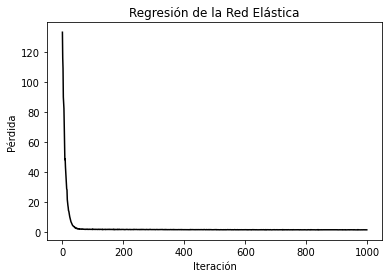

In [23]:
plt.plot(loss_vec, 'k-')
plt.title("Regresión de la Red Elástica")
plt.xlabel("Iteración")
plt.ylabel("Pérdida")
plt.show()